In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

In [3]:
# Reading stock data from Yahoo Finance
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

yf.pdr_override()

# For time stamps
from datetime import datetime

In [18]:
AAPL

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-08-22,169.690002,169.860001,167.139999,167.570007,166.581772,69026800
2022-08-23,167.080002,168.710007,166.649994,167.229996,166.243759,54147100
2022-08-24,167.320007,168.110001,166.250000,167.529999,166.542007,53841500
2022-08-25,168.779999,170.139999,168.350006,170.029999,169.027283,51218200
2022-08-26,170.570007,171.050003,163.559998,163.619995,162.655045,78961000
...,...,...,...,...,...,...
2023-08-14,177.970001,179.690002,177.309998,179.460007,179.460007,43675600
2023-08-15,178.880005,179.479996,177.050003,177.449997,177.449997,43622600
2023-08-16,177.130005,178.539993,176.500000,176.570007,176.570007,46964900


In [4]:

# Chosing Stocks for ANALYSIS
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Set up Start & End date for data grab
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)


# grab the stock from yahoo (DOES NOT DISPLAY COMAPANY NAME) 
# using globals to assign the variable name for each stocks
for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)

company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]


# zip to merge both list into list 
# two loop var to loop simultaniously for both dataset
for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name

# concat four seperate stock lists into a dataframe
df = pd.concat(company_list, axis=0)
df.tail(10)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2023-08-10,139.070007,140.410004,137.490005,138.559998,138.559998,58928400,AMAZON
2023-08-11,137.399994,139.330002,137.000000,138.410004,138.410004,42832100,AMAZON
2023-08-14,138.300003,140.589996,137.750000,140.570007,140.570007,47148700,AMAZON
2023-08-15,140.050003,141.279999,137.229996,137.669998,137.669998,42781500,AMAZON
2023-08-16,137.190002,137.270004,135.009995,135.070007,135.070007,41675900,AMAZON
2023-08-17,135.460007,136.089996,133.529999,133.979996,133.979996,48354100,AMAZON
2023-08-18,131.619995,134.070007,131.149994,133.220001,133.220001,48469400,AMAZON
2023-08-21,133.740005,135.190002,132.710007,134.679993,134.679993,41442500,AMAZON
2023-08-22,135.080002,135.649994,133.729996,134.250000,134.250000,32935100,AMAZON


# Data Analysis

Data Information

In [ ]:
# Weekend is auto not included
AAPL.describe()

In [ ]:
AAPL.info()

In [1]:
a =enumerate(company_list, 1)
print ((list(a))[2])

NameError: name 'company_list' is not defined

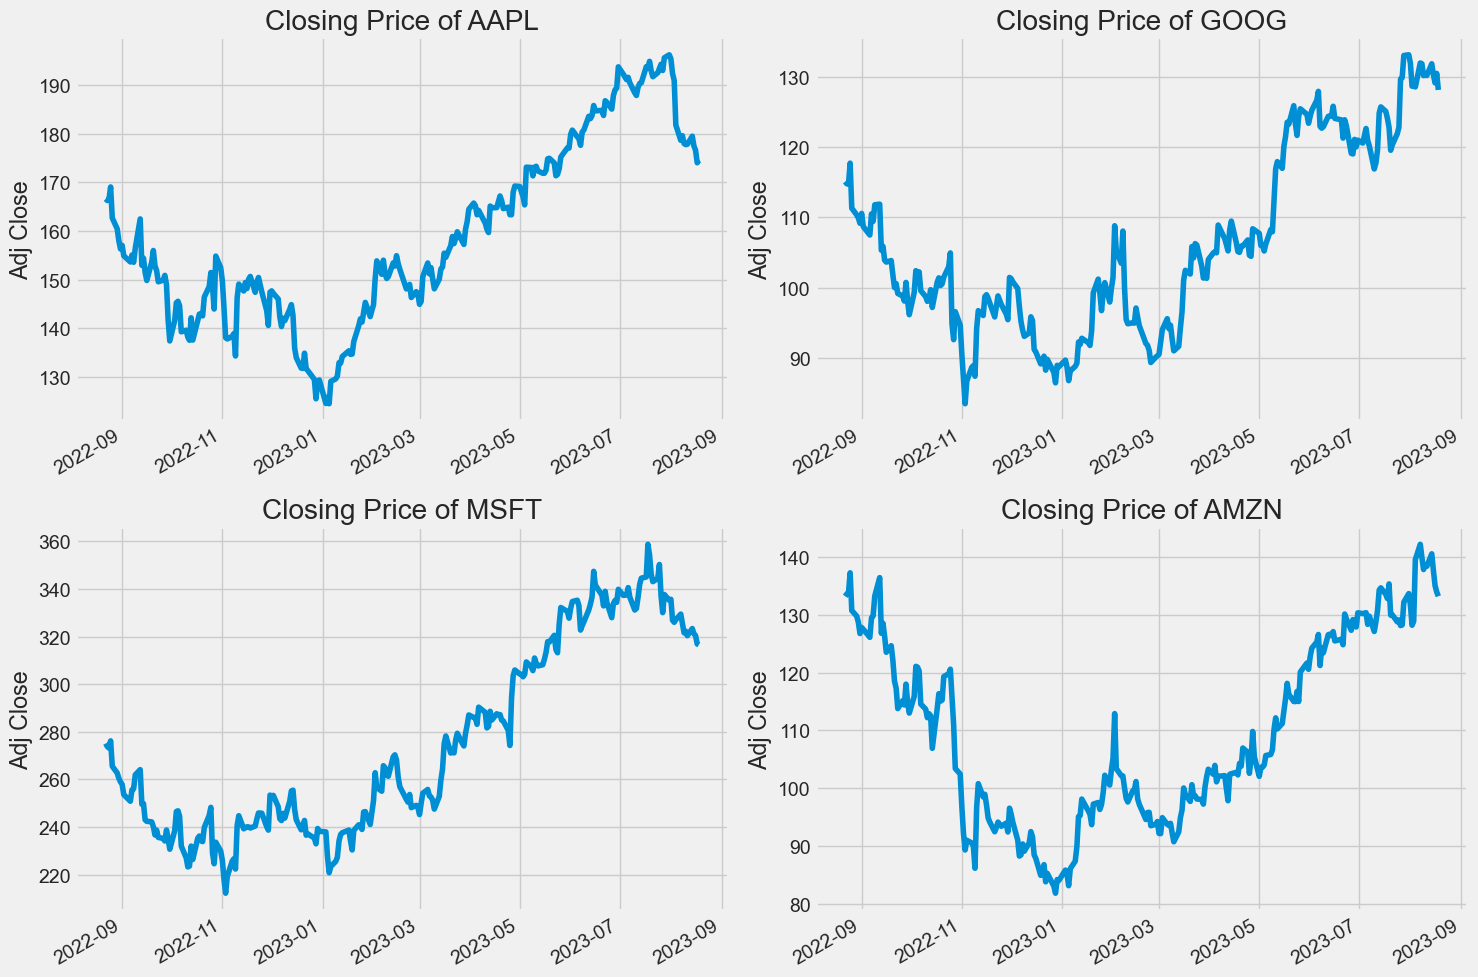

In [60]:
# enumerate to catogorize the company with 1. APPLE 2. GOOGLE, ....  (Set Starting index to 1 )
# 
plt.figure(figsize=(15,10))
plt.subplots_adjust(top=1.25,bottom=1.2)

# create each subplot for each company 
# enumerate is to keep track each company using index 
for i,company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)  
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i-1]}")  
plt.tight_layout()

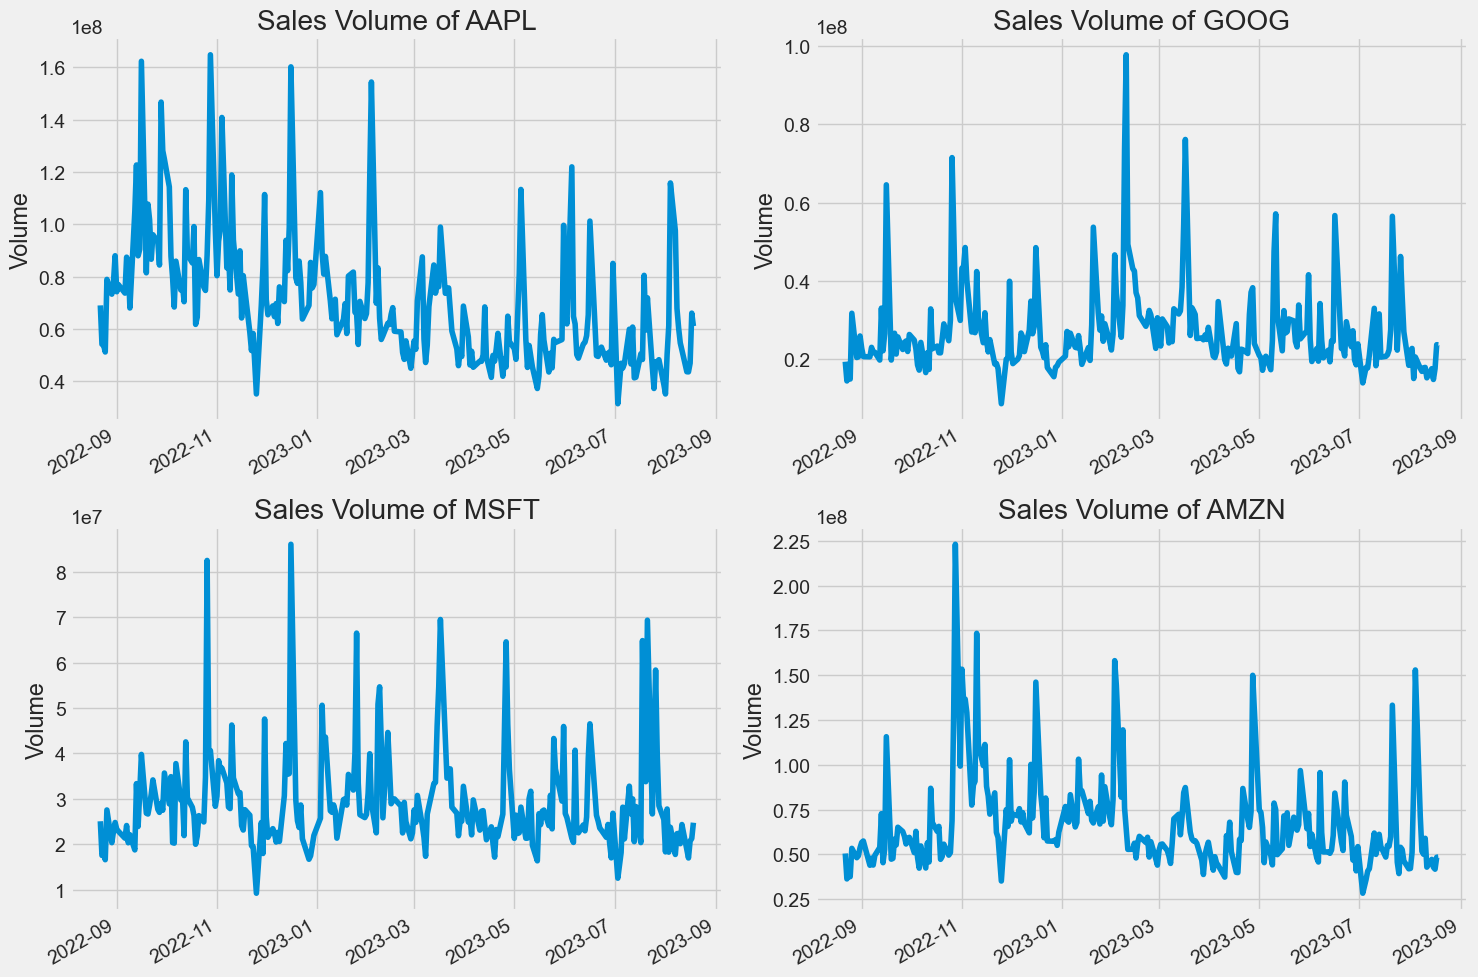

In [51]:
plt.figure(figsize=(15,10))
plt.subplots_adjust(top=1.25, bottom= 1.2)

for i,company in enumerate(company_list, 1):
    plt.subplot(2,2,i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume of {tech_list[i-1]}")

plt.tight_layout()


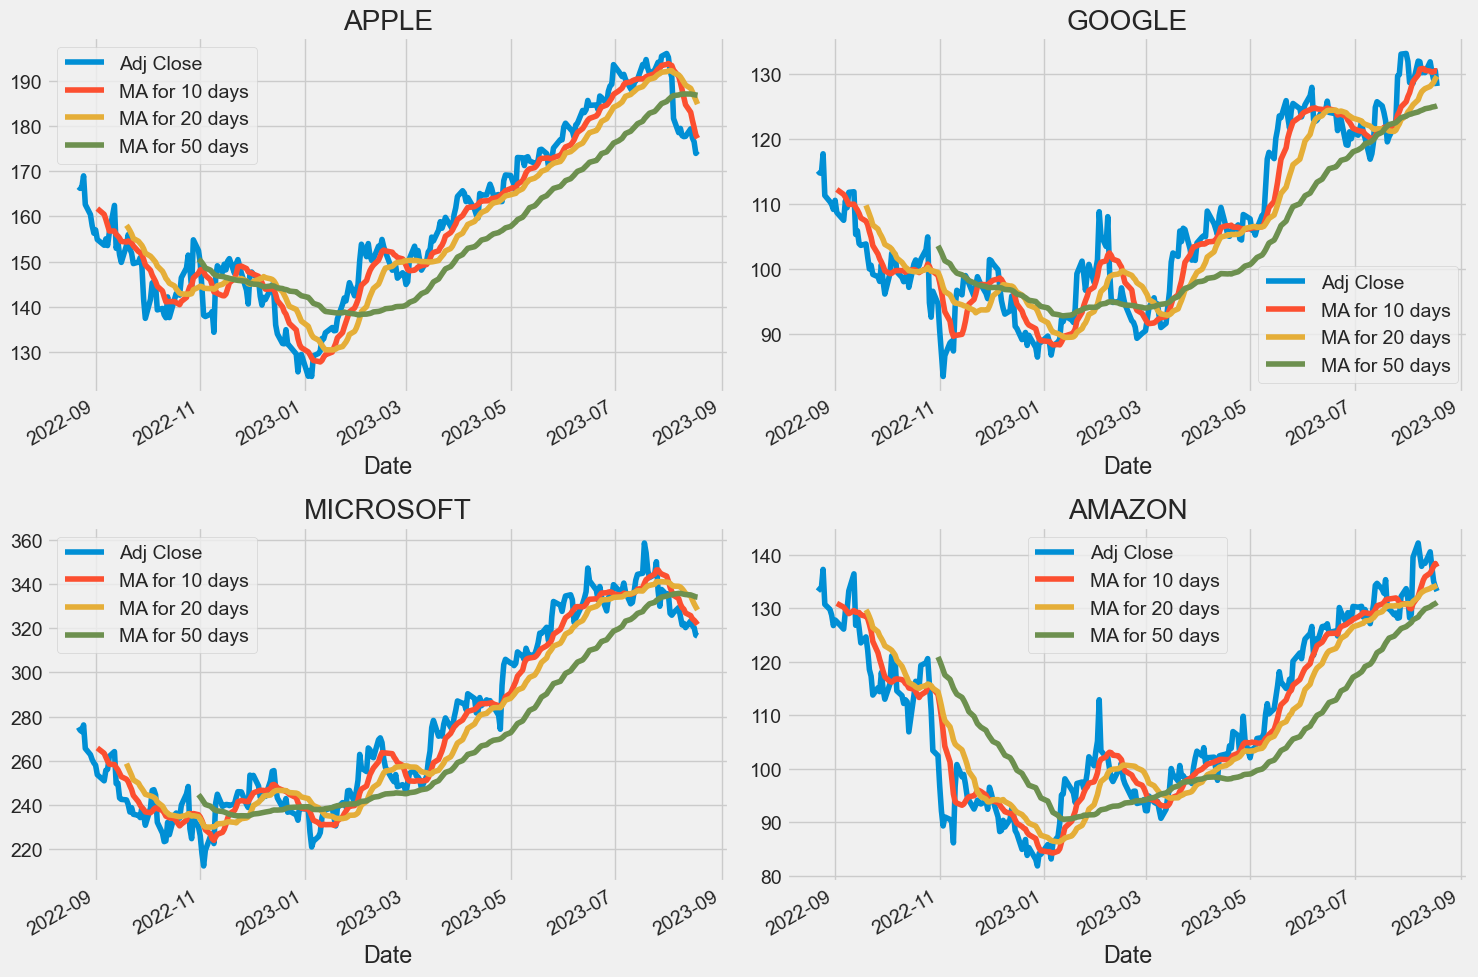

In [36]:
# Rolling function is to calculate df columns (ma) is the window size 
# here ma is 10, 20 ,50, window size is to sum/ma = sum/10 -> sum/20 -> sum/50
# mean by 10, 20 or 50 days


# Defining MOving Average Windows
ma_day = [10, 20, 50]


# Calulating ma using rolling
for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()

# set the size of subplots
fig, axes = plt.subplots(2,2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()

# Daily Return of each Stocks on Average

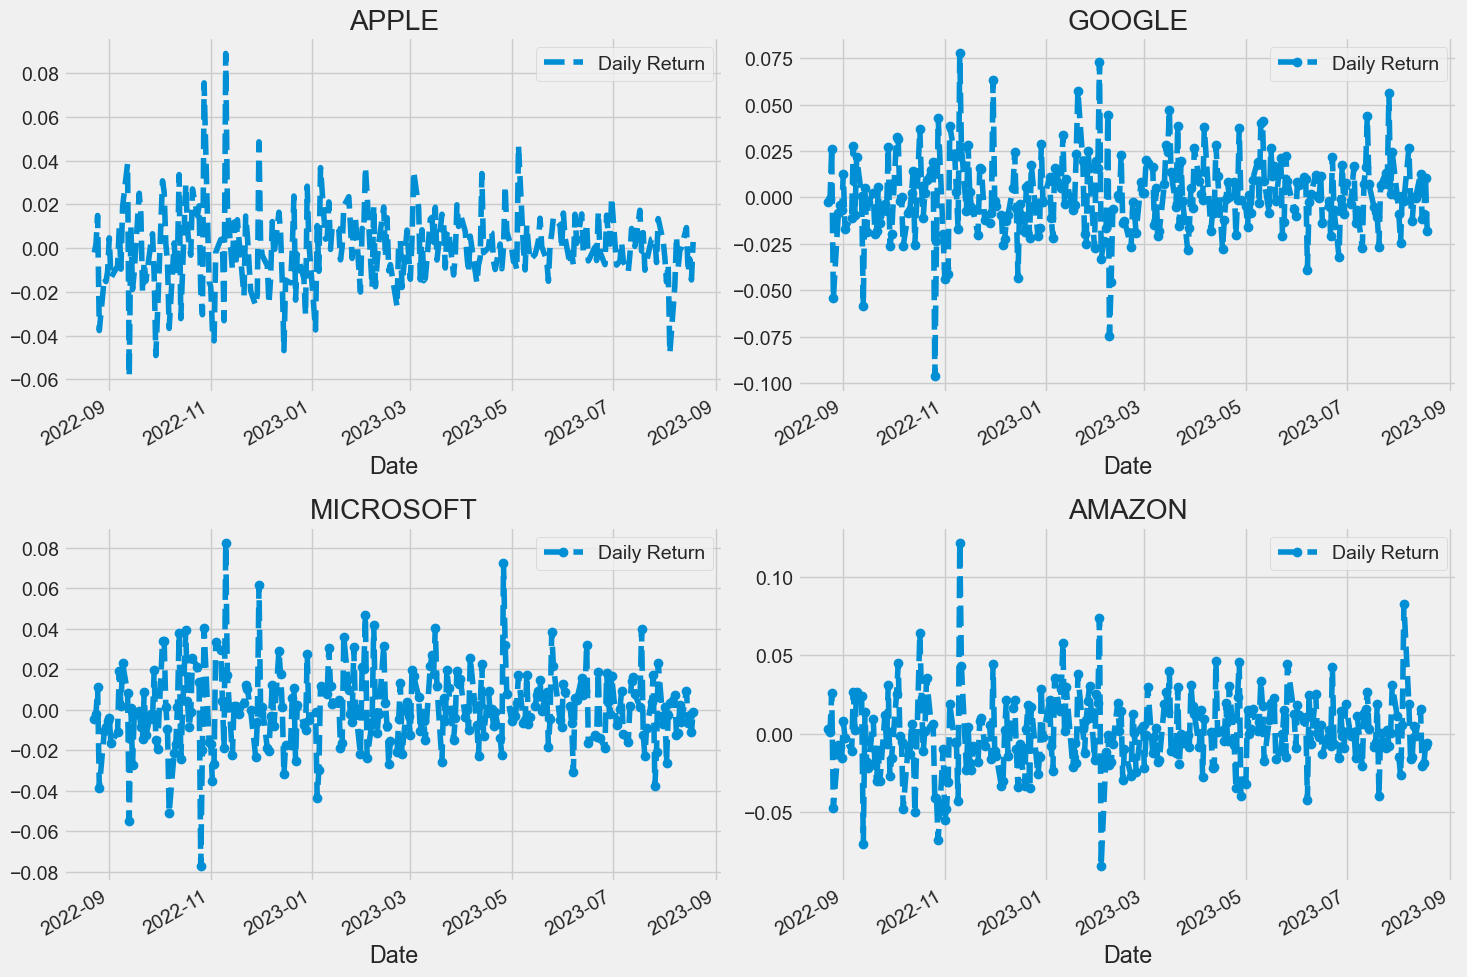

In [41]:
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

fig, axes = plt.subplots(2,2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()

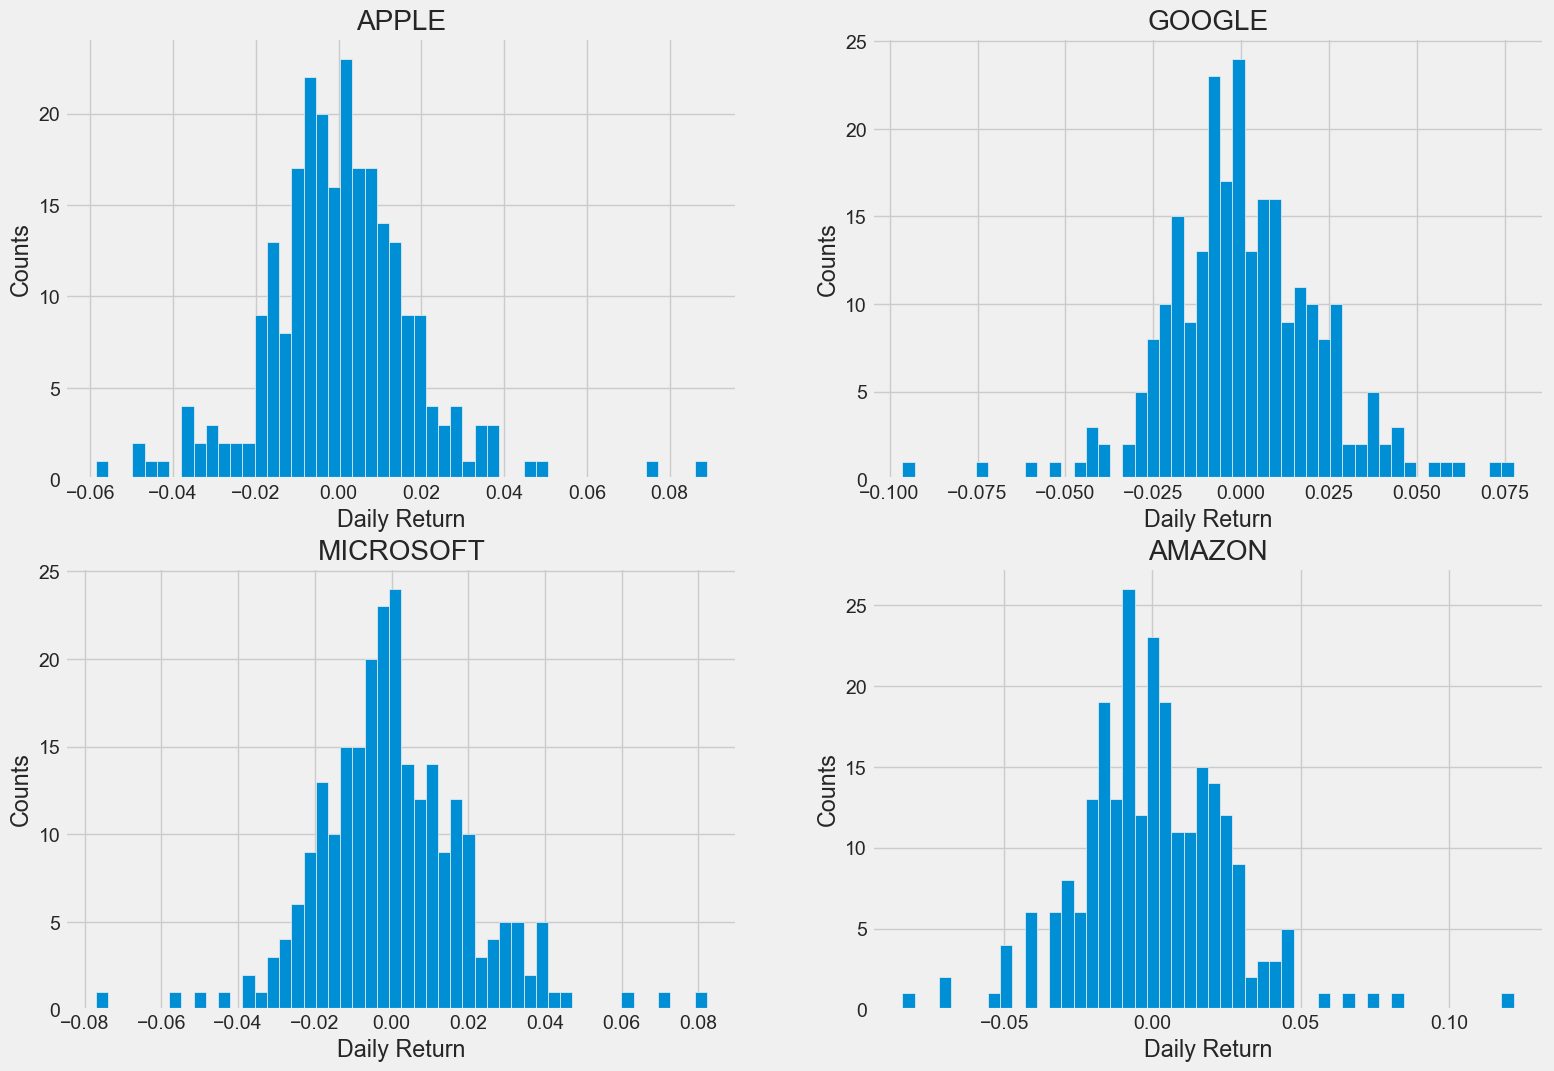

In [49]:
plt.figure(figsize=(17,12))
for i, company in enumerate(company_list, 1):
    plt.subplot(2,2,i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f"{company_name[i-1]}")
fig.tight_layout()

# Correlation between closing prices of different stocks

In [63]:
# grab all closing prices into df
close_df = pdr.get_data_yahoo(tech_list, start=start, end=end)['Adj Close']
# close_df.head()

# create df that using percentage change of closing price
tech_rets = close_df.pct_change()
tech_rets.head()

[*********************100%%**********************]  4 of 4 completed


,AAPL,AMZN,GOOG,MSFT
Date,,,,
2022-08-22,NaN,NaN,NaN,NaN
2022-08-23,-0.002029,0.003003,-0.002607,-0.004716
2022-08-24,0.001794,0.001347,-0.000610,-0.002351
2022-08-25,0.014923,0.026009,0.026155,0.011095
2022-08-26,-0.037699,-0.047567,-0.054375,-0.038587


In [ ]:
# Compare the stock itself 
sns.jointplot(x='AAPL', y='AAPL', data=tech_rets, kind='scatter',color='seagreen')


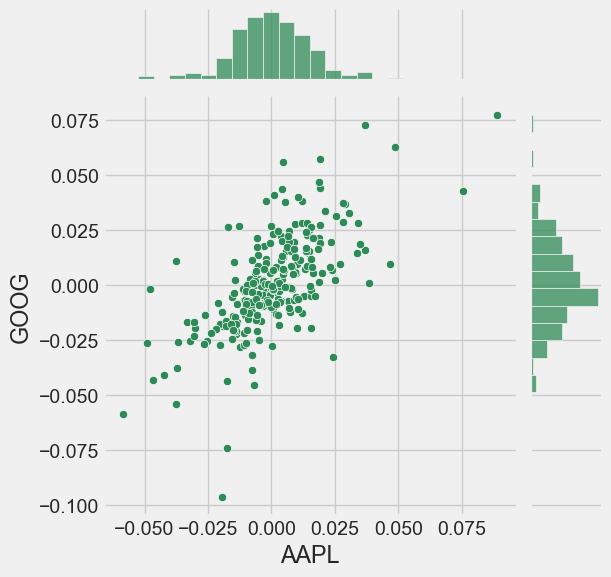

In [67]:
# Compare two stocks
sns.jointplot(x='AAPL', y='GOOG', data=tech_rets, kind='scatter',color='seagreen')


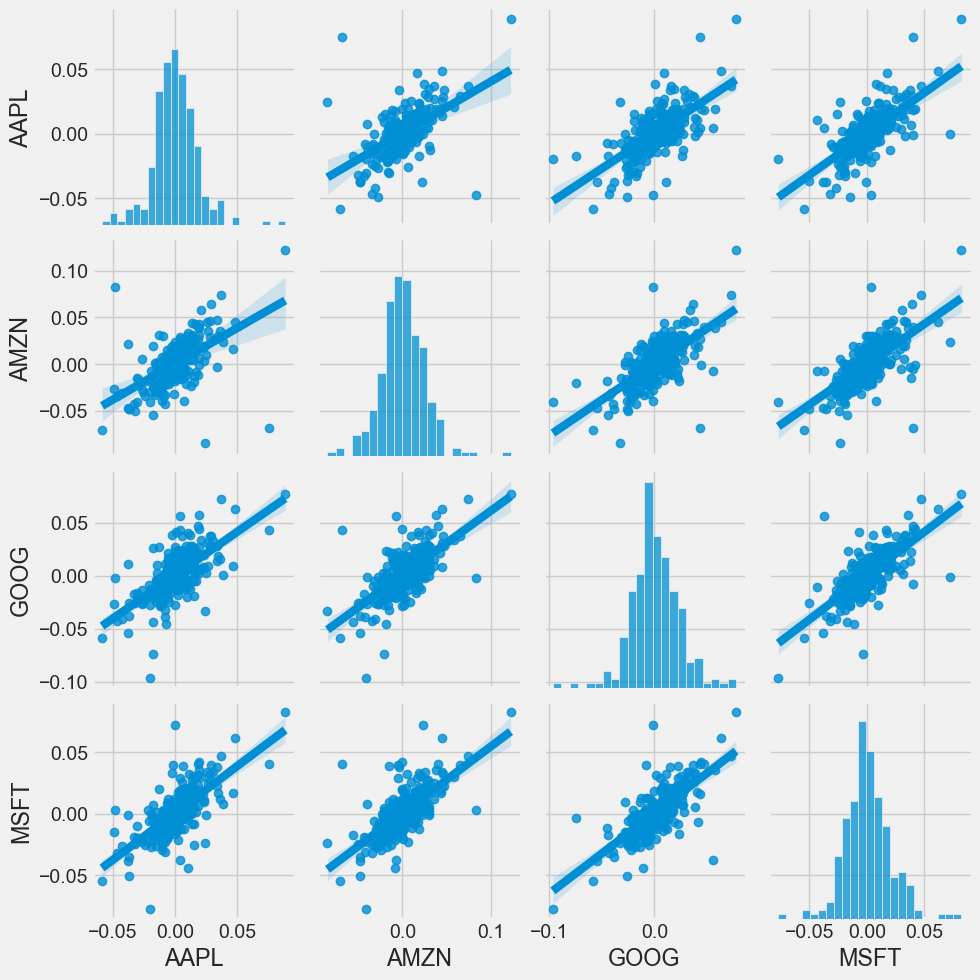

In [68]:
sns.pairplot(tech_rets, kind='reg')

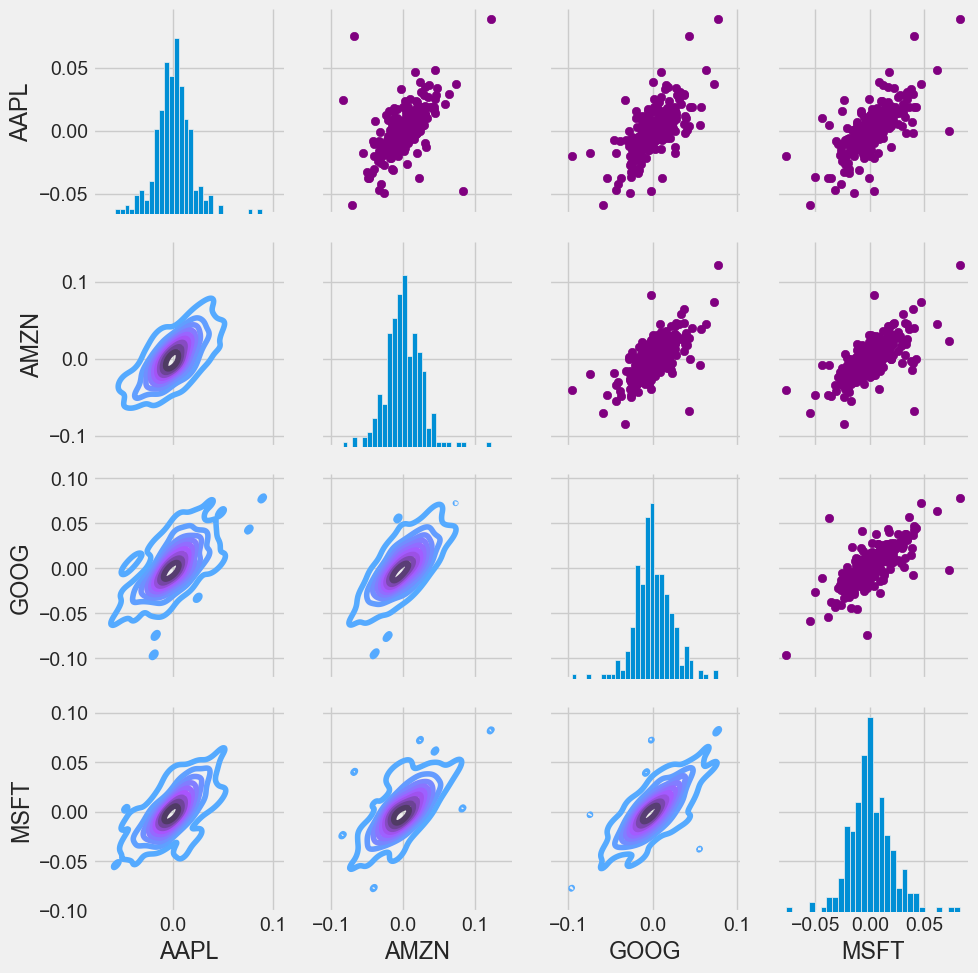

In [71]:
# Use PairGrid to get the full control figures
return_fig = sns.PairGrid(tech_rets.dropna())
return_fig.map_upper(plt.scatter, color='purple')  # Map_upper for upper triangle figures 
return_fig.map_lower(sns.kdeplot, cmap='cool_d')  # Map_lower for lower triangle figures , cmap for color map
return_fig.map_diag(plt.hist, bins=30) # Map_diag for diagonal figures

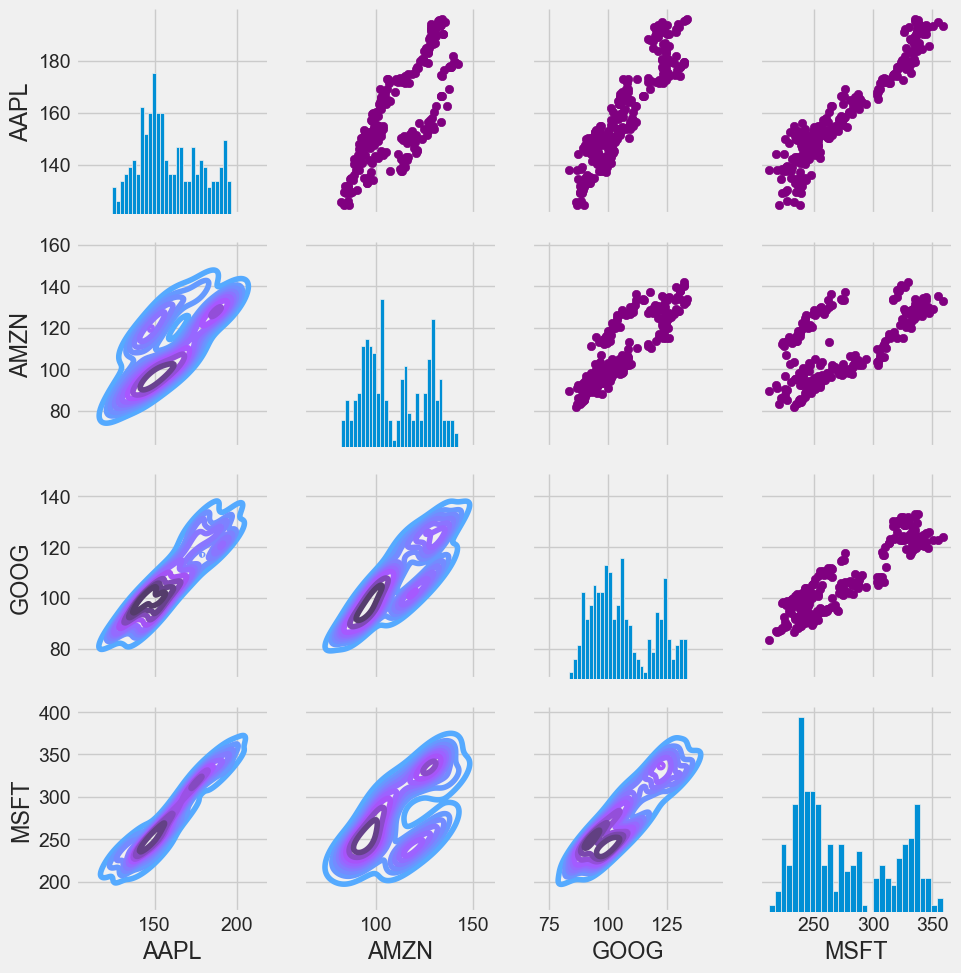

In [73]:
returns_fig = sns.PairGrid(close_df)

returns_fig.map_upper(plt.scatter,color='purple')

returns_fig.map_lower(sns.kdeplot,cmap='cool_d')


returns_fig.map_diag(plt.hist,bins=30)

Text(0.5, 1.0, 'Correlation of stock closing price')

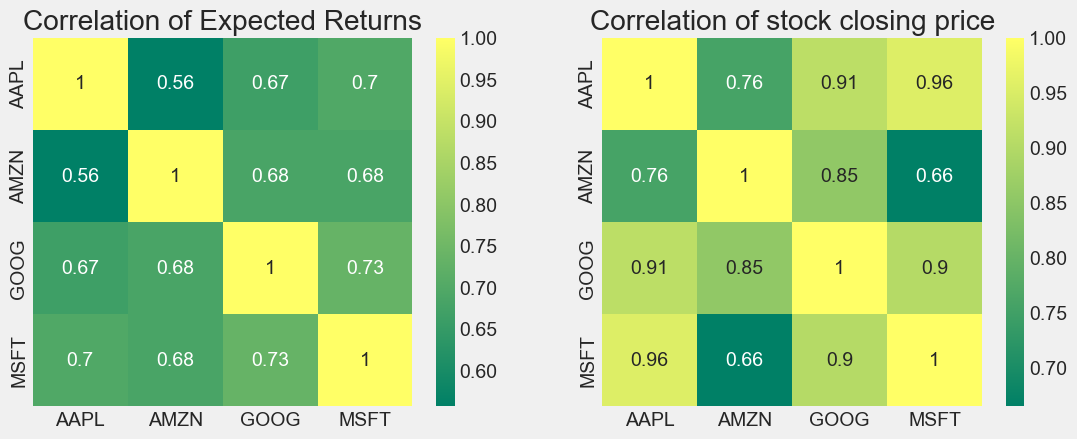

In [76]:
# Correlation between stock's daily return values
plt.figure(figsize=(12, 10))
plt.subplot(2, 2, 1)

sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')
plt.title('Correlation of Expected Returns')

plt.subplot(2, 2, 2)
sns.heatmap(close_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')

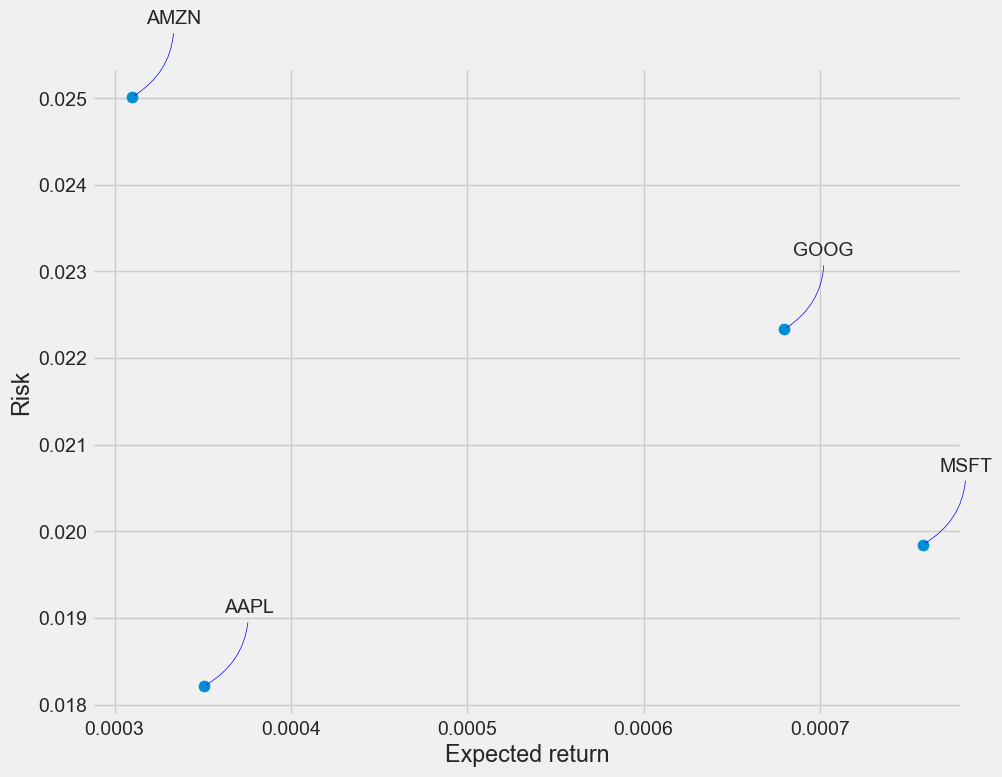

In [85]:
# Risk Analysis on a STOCK INVESTMENT
# There are many ways we can quantify risk, one of the most basic ways using the i
# nformation we've gathered on daily percentage returns 
# is by comparing the expected return with the standard deviation of the daily returns.

# tech_rets: percentage change of each stock's closing price

rets = tech_rets.dropna()
area = np.pi * 20               # area/s is for the area of dots only ,  area of a circle (π * radius squared)

plt.figure(figsize=(10,8))
plt.scatter(rets.mean(), rets.std(), s=area)        # x = mean (expected return) of the daily returns
plt.xlabel('Expected return')                       # y = std (risk) of the daily returns
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x,y), xytext=(50,50), textcoords='offset points', ha='right', va='bottom',
    arrowprops = dict(arrowstyle='-', color='blue', connectionstyle='arc3, rad=-0.3')
    )
    

# Predict the closing price of the stocks

In [48]:
df = pdr.get_data_yahoo('AAPL', start='2015-01-01', end=datetime.now())

df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,27.847500,27.860001,26.837500,27.332500,24.498678,212818400
2015-01-05,27.072500,27.162500,26.352501,26.562500,23.808519,257142000
2015-01-06,26.635000,26.857500,26.157499,26.565001,23.810759,263188400
2015-01-07,26.799999,27.049999,26.674999,26.937500,24.144636,160423600
2015-01-08,27.307501,28.037500,27.174999,27.972500,25.072327,237458000
...,...,...,...,...,...,...
2023-08-17,177.139999,177.509995,173.479996,174.000000,174.000000,66062900
2023-08-18,172.300003,175.100006,171.960007,174.490005,174.490005,61114200
2023-08-21,175.070007,176.130005,173.740005,175.839996,175.839996,46311900


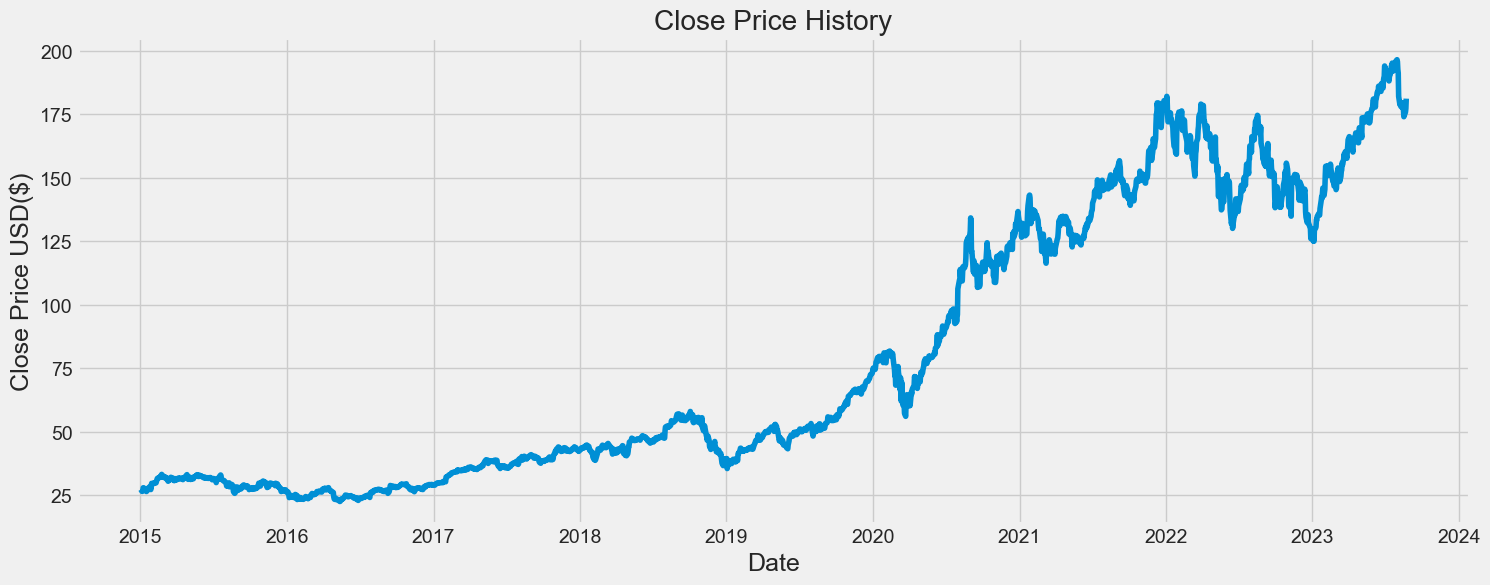

In [49]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD($)', fontsize=18)
plt.show()

In [50]:
# new df with only 'Close' column
data = df.filter(['Close'])

# Convert the new df to NUMPY ARRAY
dataset = data.values

# get the number of rows to train the model 
# * .95 is to calculate 95% of the dataset length
# np.ceil() function is used to round this value up to the nearest integer
training_data_length = int(np.ceil(len(dataset) * .95 ))
# training_data_length
training_data_length

2067

In [51]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))  # scaler created as the instance of MinMaxScaler 0 to 1 only
scaled_data = scaler.fit_transform(dataset) # apply the scaler to the dataset using .transform()
scaled_data

array([[0.02730568],
       [0.02287695],
       [0.02289133],
       ...,
       [0.88145975],
       [0.88945445],
       [0.91182813]])

In [52]:
# Create Training Dataset
train_data = scaled_data[0:int(training_data_length), :]  # 0:954, step=1

# Split the data into x_train and y_train dataset
x_train=[]
y_train=[]

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])    # exp: -59:1, 0
    y_train.append(train_data[i, 0])         # exp: 1    , 0 
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

# Convert the x_train and y_train to numpy arrays (more suitable for machine learning)
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# The result is the x_train array, which contains sequences of 60 data points each, 
# reshaped to fit the input shape required by the model. This dataset will be used to
#  train a time series prediction model.


[array([0.02730568, 0.02287695, 0.02289133, 0.0250338 , 0.03098669,
       0.03115924, 0.02719064, 0.0285854 , 0.02798149, 0.02369655,
       0.02250309, 0.02642856, 0.02762202, 0.03172002, 0.032554  ,
       0.03272654, 0.02703247, 0.0359043 , 0.04106635, 0.03856441,
       0.04067811, 0.04070688, 0.04201536, 0.04256177, 0.04110949,
       0.04224543, 0.04555258, 0.04966497, 0.05193685, 0.05282835,
       0.05390678, 0.0551865 , 0.05479826, 0.05630806, 0.0613407 ,
       0.06014724, 0.05528714, 0.05763092, 0.05481266, 0.05571852,
       0.05610676, 0.05492767, 0.05186496, 0.05213816, 0.05291462,
       0.04913296, 0.04586892, 0.04904668, 0.04781008, 0.04976562,
       0.05277084, 0.05482703, 0.05343227, 0.05113163, 0.05301528,
       0.05226757, 0.04750813, 0.04874472, 0.0473212 , 0.05180745])]
[0.04901792250616782]

[array([0.02730568, 0.02287695, 0.02289133, 0.0250338 , 0.03098669,
       0.03115924, 0.02719064, 0.0285854 , 0.02798149, 0.02369655,
       0.02250309, 0.02642856, 0.02

if you're using historical weather data to predict the temperature for the next day, each time step might consist of temperature, humidity, and wind speed. Here, 1 indicates that you're using only one feature in each time step.

x_train represents the input training data, and y_train represents the corresponding target labels. The batch_size specifies how many samples are used in each iteration of gradient descent during training. The epochs parameter determines how many times the entire training dataset is passed through the model during training.

In [53]:
# Building the LSTM Model
from keras.models import Sequential
from keras.layers import Dense, LSTM  # DEnse id for adding dense (fully connected) layers

# Build MODEL
model = Sequential()                                # creating sequential model (2 LSTM layer and 2 Dense Layers)
model.add(LSTM(128, return_sequences=True,          # 128 cells
          input_shape=(x_train.shape[1],1)          # input_shape is the shape of the input data
          ))                                        # x_train.shape[1] is the length of each input sequence, and only 1 is the number of features in each time step.
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile Model
model.compile(optimizer='adam', loss='mean_squared_error')      # optimizer is to updating the weights of the model during training 
                                                                # loss measures how erll the model's predictions match the actual values

# Train the MODEL
model.fit(x_train, y_train, batch_size=1, epochs=1)



2007/2007 [==============================] - 76s 34ms/step - loss: 0.0021


In [54]:
# Create the testing dataset (a portion of the scaled data)
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_length - 60: , :]

# Create the dataset x_test and y_test
x_test = []
y_test = dataset[training_data_length:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data (LSTM expects (batch_size, timesteps, features))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean sqaured error (RMSE) (To see the performance of model)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

4/4 [==============================] - 2s 34ms/step


9.183601250783417

<function __main__.decorator(func)>

C:\Users\YongYeeCheng\AppData\Local\Temp\ipykernel_20820\3399474402.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


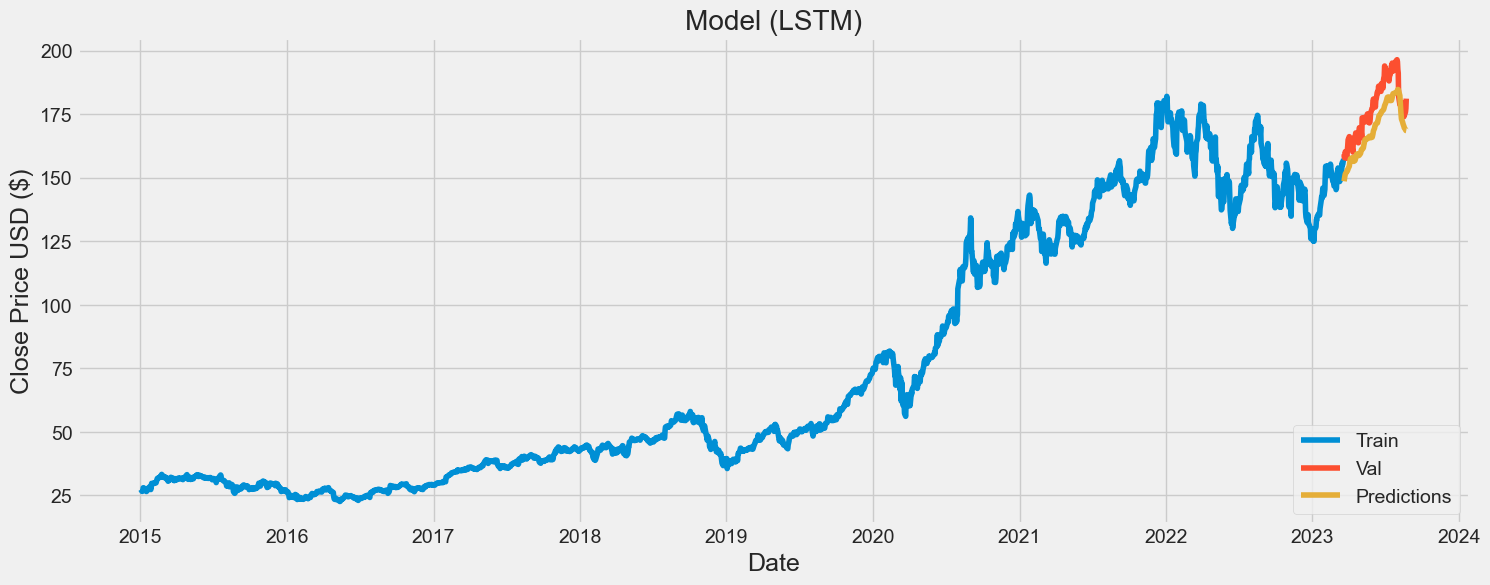

In [55]:
# Plot the data 
train = data[:training_data_length]
valid = data[training_data_length:]
valid['Predictions'] = predictions

# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model (LSTM)')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [35]:
valid


,Close,Predictions
Date,,
2023-08-14,179.460007,184.683945
2023-08-15,177.449997,183.850494
2023-08-16,176.570007,183.077820
2023-08-17,174.000000,182.354111
2023-08-18,174.490005,181.616028
2023-08-21,175.839996,180.913712
2023-08-22,177.229996,180.309372
2023-08-23,181.119995,179.843414
